# Processor Simulator Analysis

### Load modules and define graph functions

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib
import brewer2mpl
import os


# from matplotlib import rc
# rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
# rc('text', usetex=True)

def remove_splines(ax, spl):
    for s in spl:
        ax.spines[s].set_visible(False)  

def modify_splines(ax, lwd, col):    
    for s in ['bottom', 'left','top','right']:
        ax.spines[s].set_linewidth(lwd)
        ax.spines[s].set_color(col)    

def ggplot(ax):
    
    modify_splines(ax, lwd=0.75, col='0.8')
    remove_splines(ax, ['top','right'])
    
    ax.patch.set_facecolor('0.93')
    ax.yaxis.grid(True, 'major', color='0.98', linestyle='-', linewidth=1.0)
    
    ax.set_axisbelow(True)   
    
    
def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        
        if (height != 0):
            ax.text(rect.get_x() + rect.get_width()/2., 1.015*height,
                    '%.1f' % float(height),
                    ha='center', va='bottom', fontsize=12)

### Load data from simulator log files

In [16]:

## Get result directories
programs = [x[0] for x in os.walk('.')]
programs.remove('./.ipynb_checkpoints')
# programs.remove('./bubble_sort')


programs.remove('.')
programs = [x[2:] for x in programs]

## Read results
non_pipelined = {}
pipelined     = {}
superscalar_2bit   = {}
superscalar_2bit_btb   = {}


superscalar_taken   = {}
superscalar_not_taken   = {}



superscalar_4way   = {}
superscalar_6way   = {}
superscalar_8way   = {}
superscalar_8way2   = {}




def parse_processor_logs(filename, result_dict):
    for p in programs:
        file = open(p + filename, "r")
        file.readline()
        line = file.readline()
        while line[0] != '#':
            split_line = line.split(',')
#             result_dict[split_line[0]] = split_line[1][:-1]
            line = file.readline()

        line = file.readline()
        while line[0] != '#':
            split_line = line.split(',')
            if split_line[0] in result_dict:
                result_dict[split_line[0]] = result_dict[split_line[0]] + [float(split_line[1][:-1])] 
            else:
                result_dict[split_line[0]] = [float(split_line[1][:-1])]
            line = file.readline()
        result_dict["Proportion of Program spent completing memory access"] = result_dict["Proportion of Program spent Waiting for Memory Access"]


            
# parse_processor_logs("/non-pipelined.log", non_pipelined)
# parse_processor_logs("/pipelined.log", pipelined)
# parse_processor_logs("/superscalar-nt.log", superscalar_not_taken)
# parse_processor_logs("/superscalar-t.log", superscalar_taken)
# parse_processor_logs("/superscalar.log", superscalar_2bit)
# parse_processor_logs("/superscalar-btb.log", superscalar_2bit_btb)


parse_processor_logs("/superscalar-4way.log", superscalar_4way)
parse_processor_logs("/superscalar-6way.log", superscalar_6way)
parse_processor_logs("/superscalar-8way.log", superscalar_8way)
parse_processor_logs("/superscalar-8way2.log", superscalar_8way2)






print(superscalar_4way)
print(superscalar_6way)
print(superscalar_8way)
print(superscalar_8way2)




print(pipelined)
print(superscalar_not_taken)
print(superscalar_taken)
print(superscalar_2bit)
print(superscalar_2bit_btb)

{'Executed Instructions': [132964.0, 50015.0, 1552.0, 619.0, 52341.0], 'Total Cycles': [76579.0, 20034.0, 1563.0, 531.0, 26868.0], 'Instructions per Cycle': [1.74, 2.5, 0.99, 1.17, 1.95], 'Proportion of Program spent Waiting for Memory Access': [0.84, 0.0, 0.99, 0.01, 0.72], 'Branch Prediction Accuracy': [0.95, 1.0, 1.0, 0.99, 0.88], 'Proportion of Program spent completing memory access': [0.84, 0.0, 0.99, 0.01, 0.72]}
{'Executed Instructions': [140419.0, 50015.0, 1564.0, 590.0, 53977.0], 'Total Cycles': [80082.0, 10032.0, 1635.0, 514.0, 24651.0], 'Instructions per Cycle': [1.75, 4.99, 0.96, 1.15, 2.19], 'Proportion of Program spent Waiting for Memory Access': [0.82, 0.0, 0.95, 0.01, 0.71], 'Branch Prediction Accuracy': [0.94, 1.0, 1.0, 0.99, 0.82], 'Proportion of Program spent completing memory access': [0.82, 0.0, 0.95, 0.01, 0.71]}
{'Executed Instructions': [140003.0, 50016.0, 1564.0, 589.0, 55336.0], 'Total Cycles': [81928.0, 10032.0, 1635.0, 497.0, 23854.0], 'Instructions per Cycl

### Produce graphs from simultator logs

In [8]:
for key in non_pipelined:
    fig = plt.figure(figsize=(16, 8))
    ax = fig.add_subplot(111)

    color = brewer2mpl.get_map('YlOrRd', 'Sequential', 5).mpl_colors

    # data to plot
    n_groups = len(programs)

    index = np.arange(n_groups)
    bar_width = 0.2
    opacity = 1.0

    rects1 = plt.bar(index, non_pipelined[key], bar_width,
                     alpha=opacity,color=color[2],label='Non Pipelined')
    rects2 = plt.bar(index+bar_width, pipelined[key], bar_width,
                     alpha=opacity,color=color[1],label='Pipelined')
#     rects3 = plt.bar(index+2*bar_width, superscalar_2bit[key], bar_width,
#                      alpha=opacity,color=color[1],label='Superscalar')

    ax.set_xlabel('Benchmarks', fontsize=16)
    ax.set_ylabel(key, fontsize=16)
    ax.set_title("Pipelining vs Scalar: " + key, fontsize=22)

    # plt.rc('text', usetex=True)
    # plt.rc('font', family='serif')

    plt.xticks(index + 1*bar_width, programs)

    ax.legend(fontsize=14)
    ggplot(ax)
    plt.savefig(key + " (serial_vs_superscalar).pdf", bbox_inches = 'tight', pad_inches = 0)
    plt.show()

In [9]:
print(programs)
for key in non_pipelined:
    fig = plt.figure(figsize=(16, 8))
    ax = fig.add_subplot(111)

    color = brewer2mpl.get_map('YlOrRd', 'Sequential', 5).mpl_colors

    # data to plot
    n_groups = len(programs)

    index = np.arange(n_groups)
    bar_width = 0.1
    opacity = 1.0

    rects1 = plt.bar(index, superscalar_not_taken[key], bar_width,
                     alpha=opacity,color=color[3],label='Static Not Taken')
    rects2 = plt.bar(index+bar_width, superscalar_taken[key], bar_width,
                     alpha=opacity,color=color[2],label='Static Taken')
    rects3 = plt.bar(index+2*bar_width, superscalar_2bit[key], bar_width,
                     alpha=opacity,color=color[1],label='Dyamic 2 Bit')
    rects4 = plt.bar(index+3*bar_width, superscalar_2bit_btb[key], bar_width,
                     alpha=opacity,color=color[0],label='Dyamic 2 Bit + BTB')

    ax.set_xlabel('Benchmarks', fontsize=16)
    ax.set_ylabel(key, fontsize=16)
    ax.set_title('Branch Predictor Accuracy', fontsize=22)

    # plt.rc('text', usetex=True)
    # plt.rc('font', family='serif')

    plt.xticks(index + 1.5*bar_width, programs)

    ax.legend(fontsize=14)
    ggplot(ax)
    plt.savefig(key + " (comparing_branch_predictors).pdf", bbox_inches = 'tight', pad_inches = 0)
    plt.show()

['sum_n_natural', 'stencil', 'independent_math', 'branch-1bitalternate', 'vector_add', 'factorial', 'gcd', 'branch-4bitalternate', 'imatmul', 'addition']


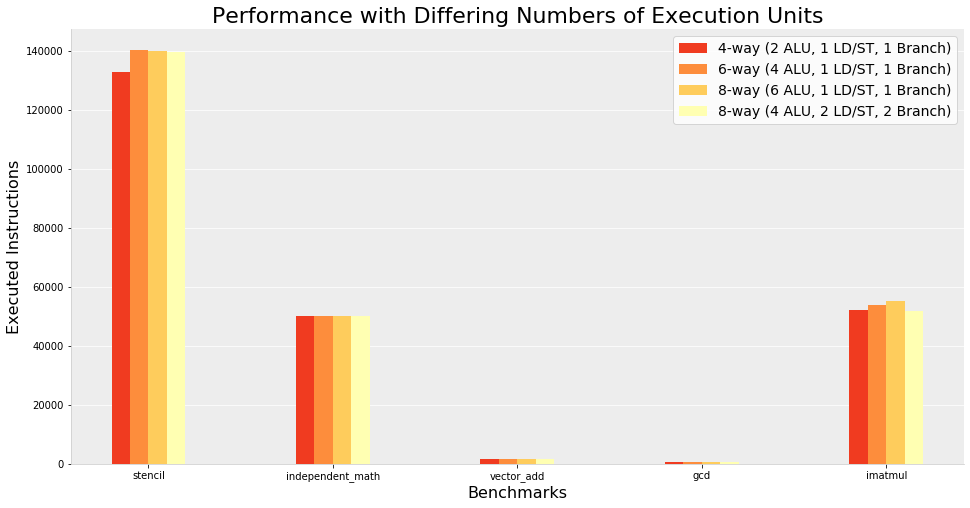

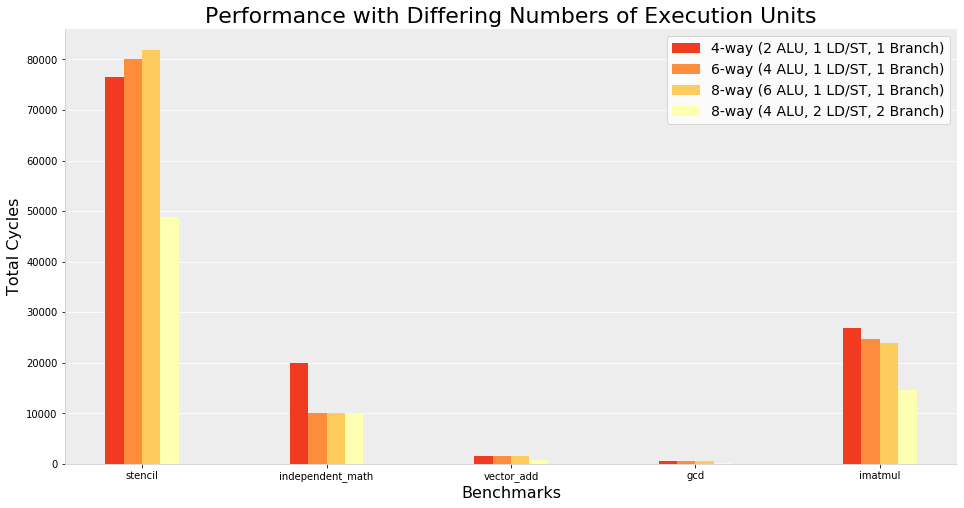

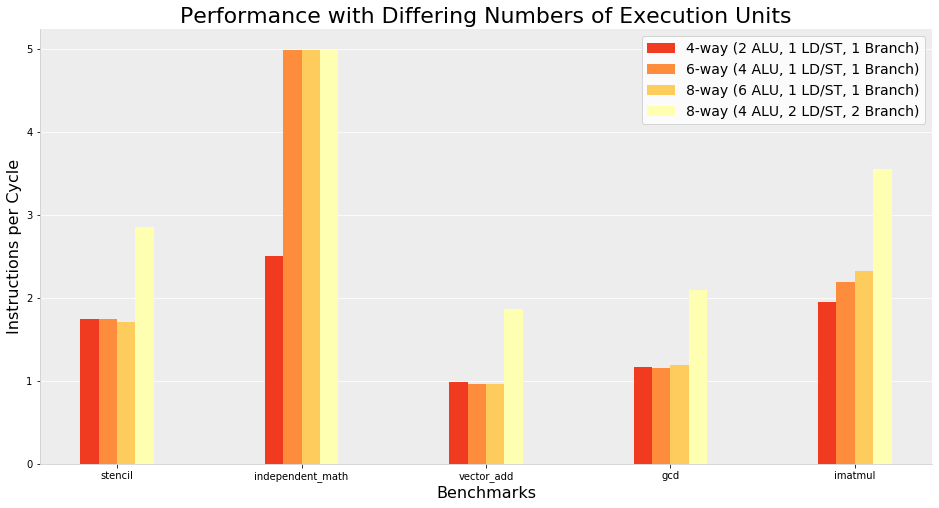

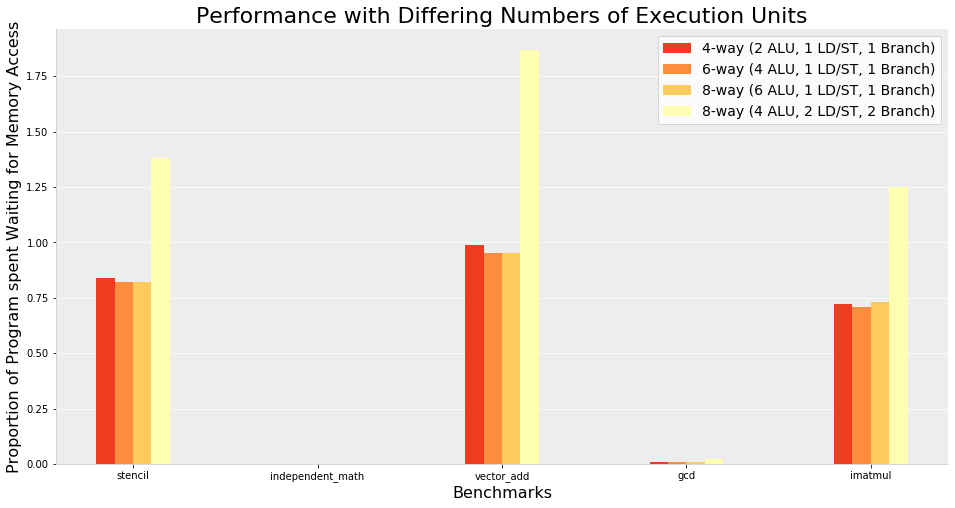

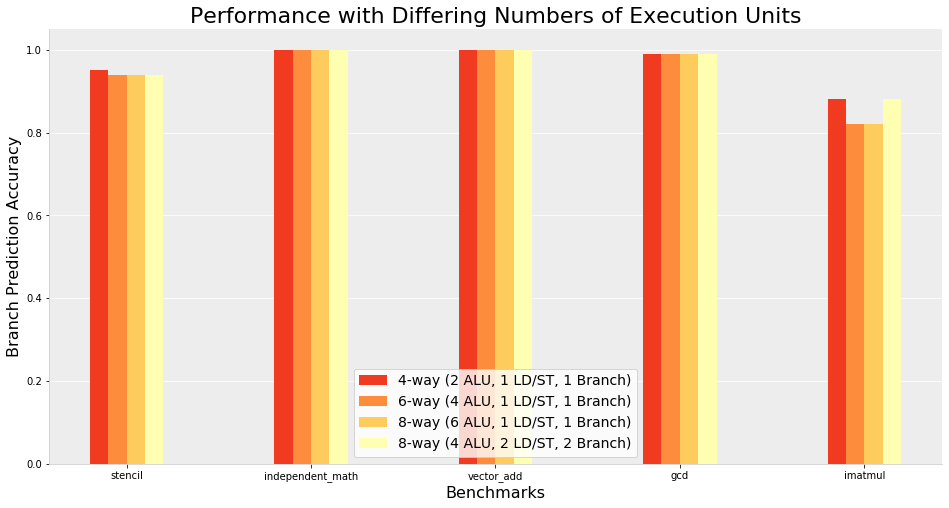

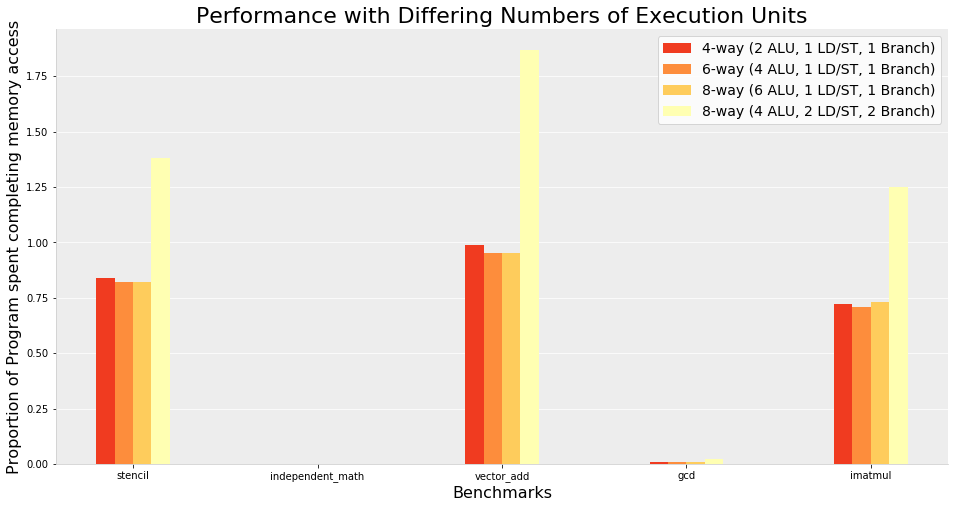

In [19]:
for key in superscalar_4way:
    fig = plt.figure(figsize=(16, 8))
    ax = fig.add_subplot(111)

    color = brewer2mpl.get_map('YlOrRd', 'Sequential', 5).mpl_colors

    # data to plot
    n_groups = len(programs)

    index = np.arange(n_groups)
    bar_width = 0.1
    opacity = 1.0

    rects1 = plt.bar(index, superscalar_4way[key], bar_width,
                     alpha=opacity,color=color[3],label='4-way (2 ALU, 1 LD/ST, 1 Branch)')
    rects2 = plt.bar(index+bar_width, superscalar_6way[key], bar_width,
                     alpha=opacity,color=color[2],label='6-way (4 ALU, 1 LD/ST, 1 Branch)')
    rects3 = plt.bar(index+2*bar_width, superscalar_8way[key], bar_width,
                     alpha=opacity,color=color[1],label='8-way (6 ALU, 1 LD/ST, 1 Branch)')
    rects4 = plt.bar(index+3*bar_width, superscalar_8way2[key], bar_width,
                     alpha=opacity,color=color[0],label='8-way (4 ALU, 2 LD/ST, 2 Branch)')

    ax.set_xlabel('Benchmarks', fontsize=16)
    ax.set_ylabel(key, fontsize=16)
    ax.set_title('Performance with Differing Numbers of Execution Units', fontsize=22)

    # plt.rc('text', usetex=True)
    # plt.rc('font', family='serif')

    plt.xticks(index + 1.5*bar_width, programs)

    ax.legend(fontsize=14)
    ggplot(ax)
    plt.savefig(key + " (comparing_execution_units).pdf", bbox_inches = 'tight', pad_inches = 0)
    plt.show()